In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 통계 정보 값이 너무 커서 지수로 표현될 떄 변환
pd.set_option("float_format", "{:.0f}".format)

# df 테이블 행 모두 출력되도록 펼치는 방법
pd.set_option('display.max_rows', 10000)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/ML_이상치제거_0322')

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/서울시 추가데이터.csv')

In [ ]:
s_df = pd.merge(df1, df2, how='left', on='자치구명')

In [ ]:
s_df.describe(include='all')

,접수년도,자치구명,법정동명,본번,부번,층,임대면적,전세가(만원),건축년도,건물명,평당 전세가(만원),Unnamed: 0,초/중/고등학교수,어린이집수,대학교수,병원수,공원수,관광명소수,관공서수
count,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478
unique,NaN,25,335,NaN,NaN,NaN,NaN,NaN,NaN,7675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,송파구,상계동,NaN,NaN,NaN,NaN,NaN,NaN,현대,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,77969,31788,NaN,NaN,NaN,NaN,NaN,NaN,6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2020,NaN,NaN,593,5,9,74,46638,2001,NaN,636,11,66,219,2,27,6,9,64
std,2,NaN,NaN,571,36,6,24,26471,11,NaN,281,7,20,67,2,16,3,13,26
min,2017,NaN,NaN,0,0,1,10,500,1961,NaN,4,0,35,64,0,2,2,1,25
25%,2019,NaN,NaN,199,0,4,60,29000,1992,NaN,447,5,48,170,1,18,3,3,46
50%,2020,NaN,NaN,501,0,8,76,42000,2001,NaN,588,12,62,210,2,21,5,7,62
75%,2022,NaN,NaN,800,0,13,85,58500,2010,NaN,767,17,84,266,3,36,8,13,73


In [ ]:
s_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
s_df.isnull().sum()

접수년도          0
자치구명          0
법정동명          0
본번            0
부번            0
층             0
임대면적          0
전세가(만원)       0
건축년도          0
건물명           0
평당 전세가(만원)    0
초/중/고등학교수     0
어린이집수         0
대학교수          0
병원수           0
공원수           0
관광명소수         0
관공서수          0
dtype: int64

In [ ]:
#s_df['cctv_총계'].head()

0    7,721
1    7,721
2    7,721
3    7,721
4    7,721
Name: cctv_총계, dtype: object

In [ ]:
#s_df['cctv_총계'].describe(include='all')

count     647301
unique        25
top        4,031
freq       57050
Name: cctv_총계, dtype: object

In [ ]:
#s_df['cctv_총계'] = s_df['cctv_총계'].str.replace(',', '').astype(int)
#s_df['cctv_총계'].head()

0    7721
1    7721
2    7721
3    7721
4    7721
Name: cctv_총계, dtype: int64

In [ ]:
#s_df.to_csv('/content/drive/MyDrive/ML_이상치_외부데이터1.csv',index=False)

In [ ]:
#plt.rcParams['font.family'] = 'NanumGothic'  # 사용할 한글 폰트 지정

# sns.pairplot(s_df[['cctv_총계','사설학원_총계','시내버스정류장_총계']])

In [ ]:
s_df.reset_index(drop=True, inplace=True)

In [ ]:
s_df.to_csv('/content/drive/MyDrive/ML_외부데이터(1)추가_0322')

# 스케일링/인코딩

In [ ]:
# 연속형 데이터에 대한 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def numeric_sc(df):
    mm_sc = MinMaxScaler()
    sd_sc = StandardScaler()

    sd_sc.fit(s_df[['임대면적','건축년도']])
    df[['임대면적sc', '건축년도sc']] = sd_sc.transform(df[['임대면적', '건축년도']])

    mm_sc.fit(s_df[['층']])
    df[['층mm']] = mm_sc.transform(df[['층']])

    return df

numeric_sc(s_df).describe()

,접수년도,본번,부번,층,임대면적,전세가(만원),건축년도,평당 전세가(만원),초/중/고등학교수,어린이집수,대학교수,병원수,공원수,관광명소수,관공서수,임대면적sc,건축년도sc,층mm
count,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478
mean,2020,593,5,9,74,46638,2001,636,66,219,2,27,6,9,64,-0,-0,0
std,2,571,36,6,24,26471,11,281,20,67,2,16,3,13,26,1,1,0
min,2017,0,0,1,10,500,1961,4,35,64,0,2,2,1,25,-3,-4,0
25%,2019,199,0,4,60,29000,1992,447,48,170,1,18,3,3,46,-1,-1,0
50%,2020,501,0,8,76,42000,2001,588,62,210,2,21,5,7,62,0,-0,0
75%,2022,800,0,13,85,58500,2010,767,84,266,3,36,8,13,73,0,1,0
max,2024,4974,2837,67,150,290000,2024,2000,101,335,9,68,13,128,129,3,2,1


In [ ]:
# 범주형 데이터에 대한 인코딩
!pip install category_encoders
import category_encoders as ce

def get_category(df):
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder

    le = LabelEncoder()
    oh1 = OneHotEncoder()
    oh2 = OneHotEncoder()
    oh3 = OneHotEncoder()
    be = ce.BinaryEncoder()

    #le.fit(s_df[['자치구명']])
    #df['자치구명le'] = le.transform(df['자치구명'])
    # 각 고유 숫자마다 가중치로 인식되는 문제.. (해당 인코딩은 랜덤포레스트 사용 시)
    df.reset_index(drop=True, inplace=True)

    le.fit(s_df[['접수년도']])
    df['접수년도le'] = le.transform(df[['접수년도']])

    # 범주형 변수 이진 벡터로 변환하여 새로운 열 추가
    oh1.fit(s_df[['자치구명']])
    자치구명_csr = oh1.transform(df[['자치구명']])

    자치구명_csr_df = pd.DataFrame(자치구명_csr.toarray(),
                               columns = oh1.get_feature_names_out())
    df = pd.concat([df, 자치구명_csr_df], axis=1)

    # Target Encoder 초기화
    encoder = ce.TargetEncoder(cols=['법정동명'])

    # Target Encoding 적용
    df_encoded = encoder.fit_transform(df['법정동명'], df['전세가(만원)'])
    # 컬럼 이름 변경
    df_encoded.columns = ['법정동명te']

    df = pd.concat([df, df_encoded], axis=1)
    return df

s_df = get_category(s_df)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
s_df.columns

Index(['접수년도', '자치구명', '법정동명', '본번', '부번', '층', '임대면적', '전세가(만원)', '건축년도',
       '건물명', '평당 전세가(만원)', '초/중/고등학교수', '어린이집수', '대학교수', '병원수', '공원수',
       '관광명소수', '관공서수', '임대면적sc', '건축년도sc', '층mm', '접수년도le', '자치구명_강남구',
       '자치구명_강동구', '자치구명_강북구', '자치구명_강서구', '자치구명_관악구', '자치구명_광진구', '자치구명_구로구',
       '자치구명_금천구', '자치구명_노원구', '자치구명_도봉구', '자치구명_동대문구', '자치구명_동작구', '자치구명_마포구',
       '자치구명_서대문구', '자치구명_서초구', '자치구명_성동구', '자치구명_성북구', '자치구명_송파구', '자치구명_양천구',
       '자치구명_영등포구', '자치구명_용산구', '자치구명_은평구', '자치구명_종로구', '자치구명_중구', '자치구명_중랑구',
       '법정동명te'],
      dtype='object')

In [ ]:
s_df.isnull().sum()

접수년도          0
자치구명          0
법정동명          0
본번            0
부번            0
층             0
임대면적          0
전세가(만원)       0
건축년도          0
건물명           0
평당 전세가(만원)    0
초/중/고등학교수     0
어린이집수         0
대학교수          0
병원수           0
공원수           0
관광명소수         0
관공서수          0
임대면적sc        0
건축년도sc        0
층mm           0
접수년도le        0
자치구명_강남구      0
자치구명_강동구      0
자치구명_강북구      0
자치구명_강서구      0
자치구명_관악구      0
자치구명_광진구      0
자치구명_구로구      0
자치구명_금천구      0
자치구명_노원구      0
자치구명_도봉구      0
자치구명_동대문구     0
자치구명_동작구      0
자치구명_마포구      0
자치구명_서대문구     0
자치구명_서초구      0
자치구명_성동구      0
자치구명_성북구      0
자치구명_송파구      0
자치구명_양천구      0
자치구명_영등포구     0
자치구명_용산구      0
자치구명_은평구      0
자치구명_종로구      0
자치구명_중구       0
자치구명_중랑구      0
법정동명te        0
dtype: int64

In [ ]:
# X, y 훈련/테스트 변수 설정
from sklearn.model_selection import train_test_split

X = s_df[['임대면적sc', '건축년도sc','층mm', '접수년도le', '본번', '부번',
        '자치구명_강남구', '자치구명_강동구', '자치구명_강북구', '자치구명_강서구', '자치구명_관악구',
        '자치구명_광진구', '자치구명_구로구', '자치구명_금천구', '자치구명_노원구', '자치구명_도봉구',
        '자치구명_동대문구', '자치구명_동작구', '자치구명_마포구', '자치구명_서대문구', '자치구명_서초구',
        '자치구명_성동구', '자치구명_성북구', '자치구명_송파구', '자치구명_양천구', '자치구명_영등포구',
        '자치구명_용산구', '자치구명_은평구', '자치구명_종로구', '자치구명_중구', '자치구명_중랑구',
       '법정동명te', '초/중/고등학교수', '어린이집수', '대학교수', '병원수', '공원수', '관광명소수', '관공서수']]
y = s_df['전세가(만원)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 훈련/테스트 갯수 확인
len(X_train), len(y_train), len(X_test), len(y_test)

(705182, 705182, 176296, 176296)

In [ ]:
# 랜덤포레스트모델
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#+a MAE, MSE, RMSE, R-squared(수정된 R2도 고민)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_split =10)
model_rf.fit(X_train, y_train)

y_rf_pred = model_rf.predict(X_test)

def get_score(model_name, y_true, y_pred):
    mae = round(mean_absolute_error(y_true, y_pred), 2)
    mse = round(mean_squared_error(y_true, y_pred), 2)
    rmse = round(np.sqrt(mse), 2)
    r2 = round(r2_score(y_true, y_pred), 2)
    print(model_name, 'MAE: ', mae, ', MSE: ', mse, ', RMSE: ', rmse, ', R2 Score: ', r2)

get_score('rf ', y_test, y_rf_pred)

rf  MAE:  5030.51 , MSE:  69274544.72 , RMSE:  8323.13 , R2 Score:  0.9


In [ ]:
# adjusted R-squared
r2 = 0.91
adj_r2 = 1 - ( 1 - r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )
print(adj_r2)

0.9099800857843138


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


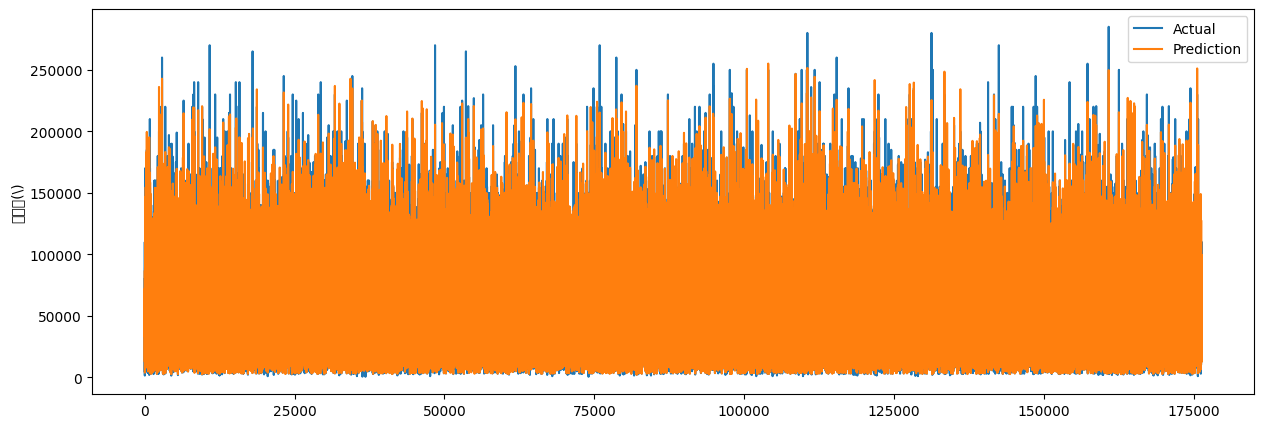

In [ ]:
# 예측 결과 시각화
y_test = y_test.reset_index(drop=True)

plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_rf_pred, label='Prediction')
plt.legend(loc='upper right')
plt.ylabel('보증금(\)')
plt.show()

In [ ]:
importances = model_rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

print("변수 중요도:")
for i, index in enumerate(sorted_indices):
    feature = X.columns[index]
    importance = round(importances[index], 4)
    print(f"{i+1}. {feature}: {importance}")

변수 중요도:
1. 법정동명te: 0.3817
2. 임대면적sc: 0.3355
3. 건축년도sc: 0.1191
4. 접수년도le: 0.0568
5. 본번: 0.0332
6. 층mm: 0.025
7. 부번: 0.0094
8. 병원수: 0.0091
9. 초/중/고등학교수: 0.0069
10. 관광명소수: 0.0049
11. 관공서수: 0.0037
12. 자치구명_강남구: 0.0029
13. 대학교수: 0.0026
14. 어린이집수: 0.0023
15. 공원수: 0.0021
16. 자치구명_서초구: 0.0008
17. 자치구명_양천구: 0.0006
18. 자치구명_마포구: 0.0005
19. 자치구명_성동구: 0.0004
20. 자치구명_강동구: 0.0003
21. 자치구명_동작구: 0.0003
22. 자치구명_은평구: 0.0002
23. 자치구명_송파구: 0.0002
24. 자치구명_영등포구: 0.0002
25. 자치구명_용산구: 0.0001
26. 자치구명_서대문구: 0.0001
27. 자치구명_구로구: 0.0001
28. 자치구명_중랑구: 0.0001
29. 자치구명_광진구: 0.0001
30. 자치구명_강서구: 0.0001
31. 자치구명_성북구: 0.0001
32. 자치구명_동대문구: 0.0001
33. 자치구명_노원구: 0.0001
34. 자치구명_중구: 0.0001
35. 자치구명_종로구: 0.0
36. 자치구명_관악구: 0.0
37. 자치구명_강북구: 0.0
38. 자치구명_도봉구: 0.0
39. 자치구명_금천구: 0.0


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 랜덤 포레스트 모델 초기화
rf_model = RandomForestRegressor()

# 범주형 변수를 포함한 데이터셋 생성 (s_df는 이미 인코딩이 완료된 데이터프레임이라고 가정)
X = s_df.drop(columns=['전세가(만원)'])  # 독립 변수
y = s_df['전세가(만원)']  # 종속 변수

# 교차 검증을 위한 함수 정의
def custom_cross_val(X, y, model, encoder, kf):
    scores = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # 타겟 인코딩 재적용
        encoder.fit(X_train['법정동명'], y_train)
        X_train_encoded = encoder.transform(X_train['법정동명'])
        X_val_encoded = encoder.transform(X_val['법정동명'])

        # 모델 학습
        model.fit(X_train_encoded, y_train)

        # 예측 및 성능 평가
        y_pred = model.predict(X_val_encoded)
        score = mean_squared_error(y_val, y_pred, squared=False)
        scores.append(score)

    return scores

# 교차 검증을 위한 K-fold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 실행
cv_scores = custom_cross_val(X, y, rf_model, encoder, kf)

# 교차 검증 결과 출력
print("Cross-validation RMSE scores:", cv_scores)
print("Average RMSE:", np.mean(cv_scores))


NameError: name 'encoder' is not defined